In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/heart_disease.csv'
df = pd.read_csv(file_path)
df = df.sort_values('age')
df = df.reset_index(drop=True)
df.head(10)

Mounted at /content/drive


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,304,28,Male,Cleveland,atypical angina,130.0,132.0,False,lv hypertrophy,185.0,False,0.0,NaN,NaN,NaN,0
1,305,29,Male,Hungary,atypical angina,120.0,243.0,False,normal,160.0,False,0.0,NaN,NaN,NaN,0
2,306,29,Male,Hungary,atypical angina,140.0,NaN,False,normal,170.0,False,0.0,NaN,NaN,NaN,0
3,133,29,Male,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,202.0,False,0.0,upsloping,0.0,normal,0
4,307,30,Female,Hungary,typical angina,170.0,237.0,False,st-t abnormality,170.0,False,0.0,NaN,NaN,fixed defect,0
5,308,31,Female,Hungary,atypical angina,100.0,219.0,False,st-t abnormality,150.0,False,0.0,NaN,NaN,NaN,0
6,492,31,Male,Hungary,asymptomatic,120.0,270.0,False,normal,153.0,True,1.5,flat,NaN,NaN,1
7,598,32,Male,Switzerland,typical angina,95.0,0.0,NaN,normal,127.0,False,0.7,upsloping,NaN,NaN,1
8,311,32,Male,Hungary,atypical angina,125.0,254.0,False,normal,155.0,False,0.0,NaN,NaN,NaN,0
9,529,32,Male,Hungary,asymptomatic,118.0,529.0,False,normal,130.0,False,0.0,NaN,NaN,NaN,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
print(df.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [ ]:
numerical_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include='object').columns
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])



/tmp/ipython-input-2409092968.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
print(df.isnull().sum())

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    bool   
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    bool   
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  ca        920 non-null    float64
 14  thal      920 non-null    object 
 15  num       920 non-null    int64  
dtypes: bool(2), float64(5), int64(3), object(6)
memory usage: 102.6+ KB


In [ ]:
df['target'] = (df['num'] > 0).astype(int)

In [ ]:
df = pd.get_dummies(df, columns=['sex','dataset','cp','restecg','slope','thal'], drop_first=True)
print("Converted categorical to numeric value")

Converted categorical to numeric value


In [ ]:
df['fbs'] = df['fbs'].astype(int)
df['exang'] = df['exang'].astype(int)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        920 non-null    int64  
 1   age                       920 non-null    int64  
 2   trestbps                  920 non-null    float64
 3   chol                      920 non-null    float64
 4   fbs                       920 non-null    int64  
 5   thalch                    920 non-null    float64
 6   exang                     920 non-null    int64  
 7   oldpeak                   920 non-null    float64
 8   ca                        920 non-null    float64
 9   num                       920 non-null    int64  
 10  target                    920 non-null    int64  
 11  sex_Male                  920 non-null    bool   
 12  dataset_Hungary           920 non-null    bool   
 13  dataset_Switzerland       920 non-null    bool   
 14  dataset_VA

In [ ]:
print(df.isnull().sum())

id                          0
age                         0
trestbps                    0
chol                        0
fbs                         0
thalch                      0
exang                       0
oldpeak                     0
ca                          0
num                         0
target                      0
sex_Male                    0
dataset_Hungary             0
dataset_Switzerland         0
dataset_VA Long Beach       0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
restecg_normal              0
restecg_st-t abnormality    0
slope_flat                  0
slope_upsloping             0
thal_normal                 0
thal_reversable defect      0
dtype: int64


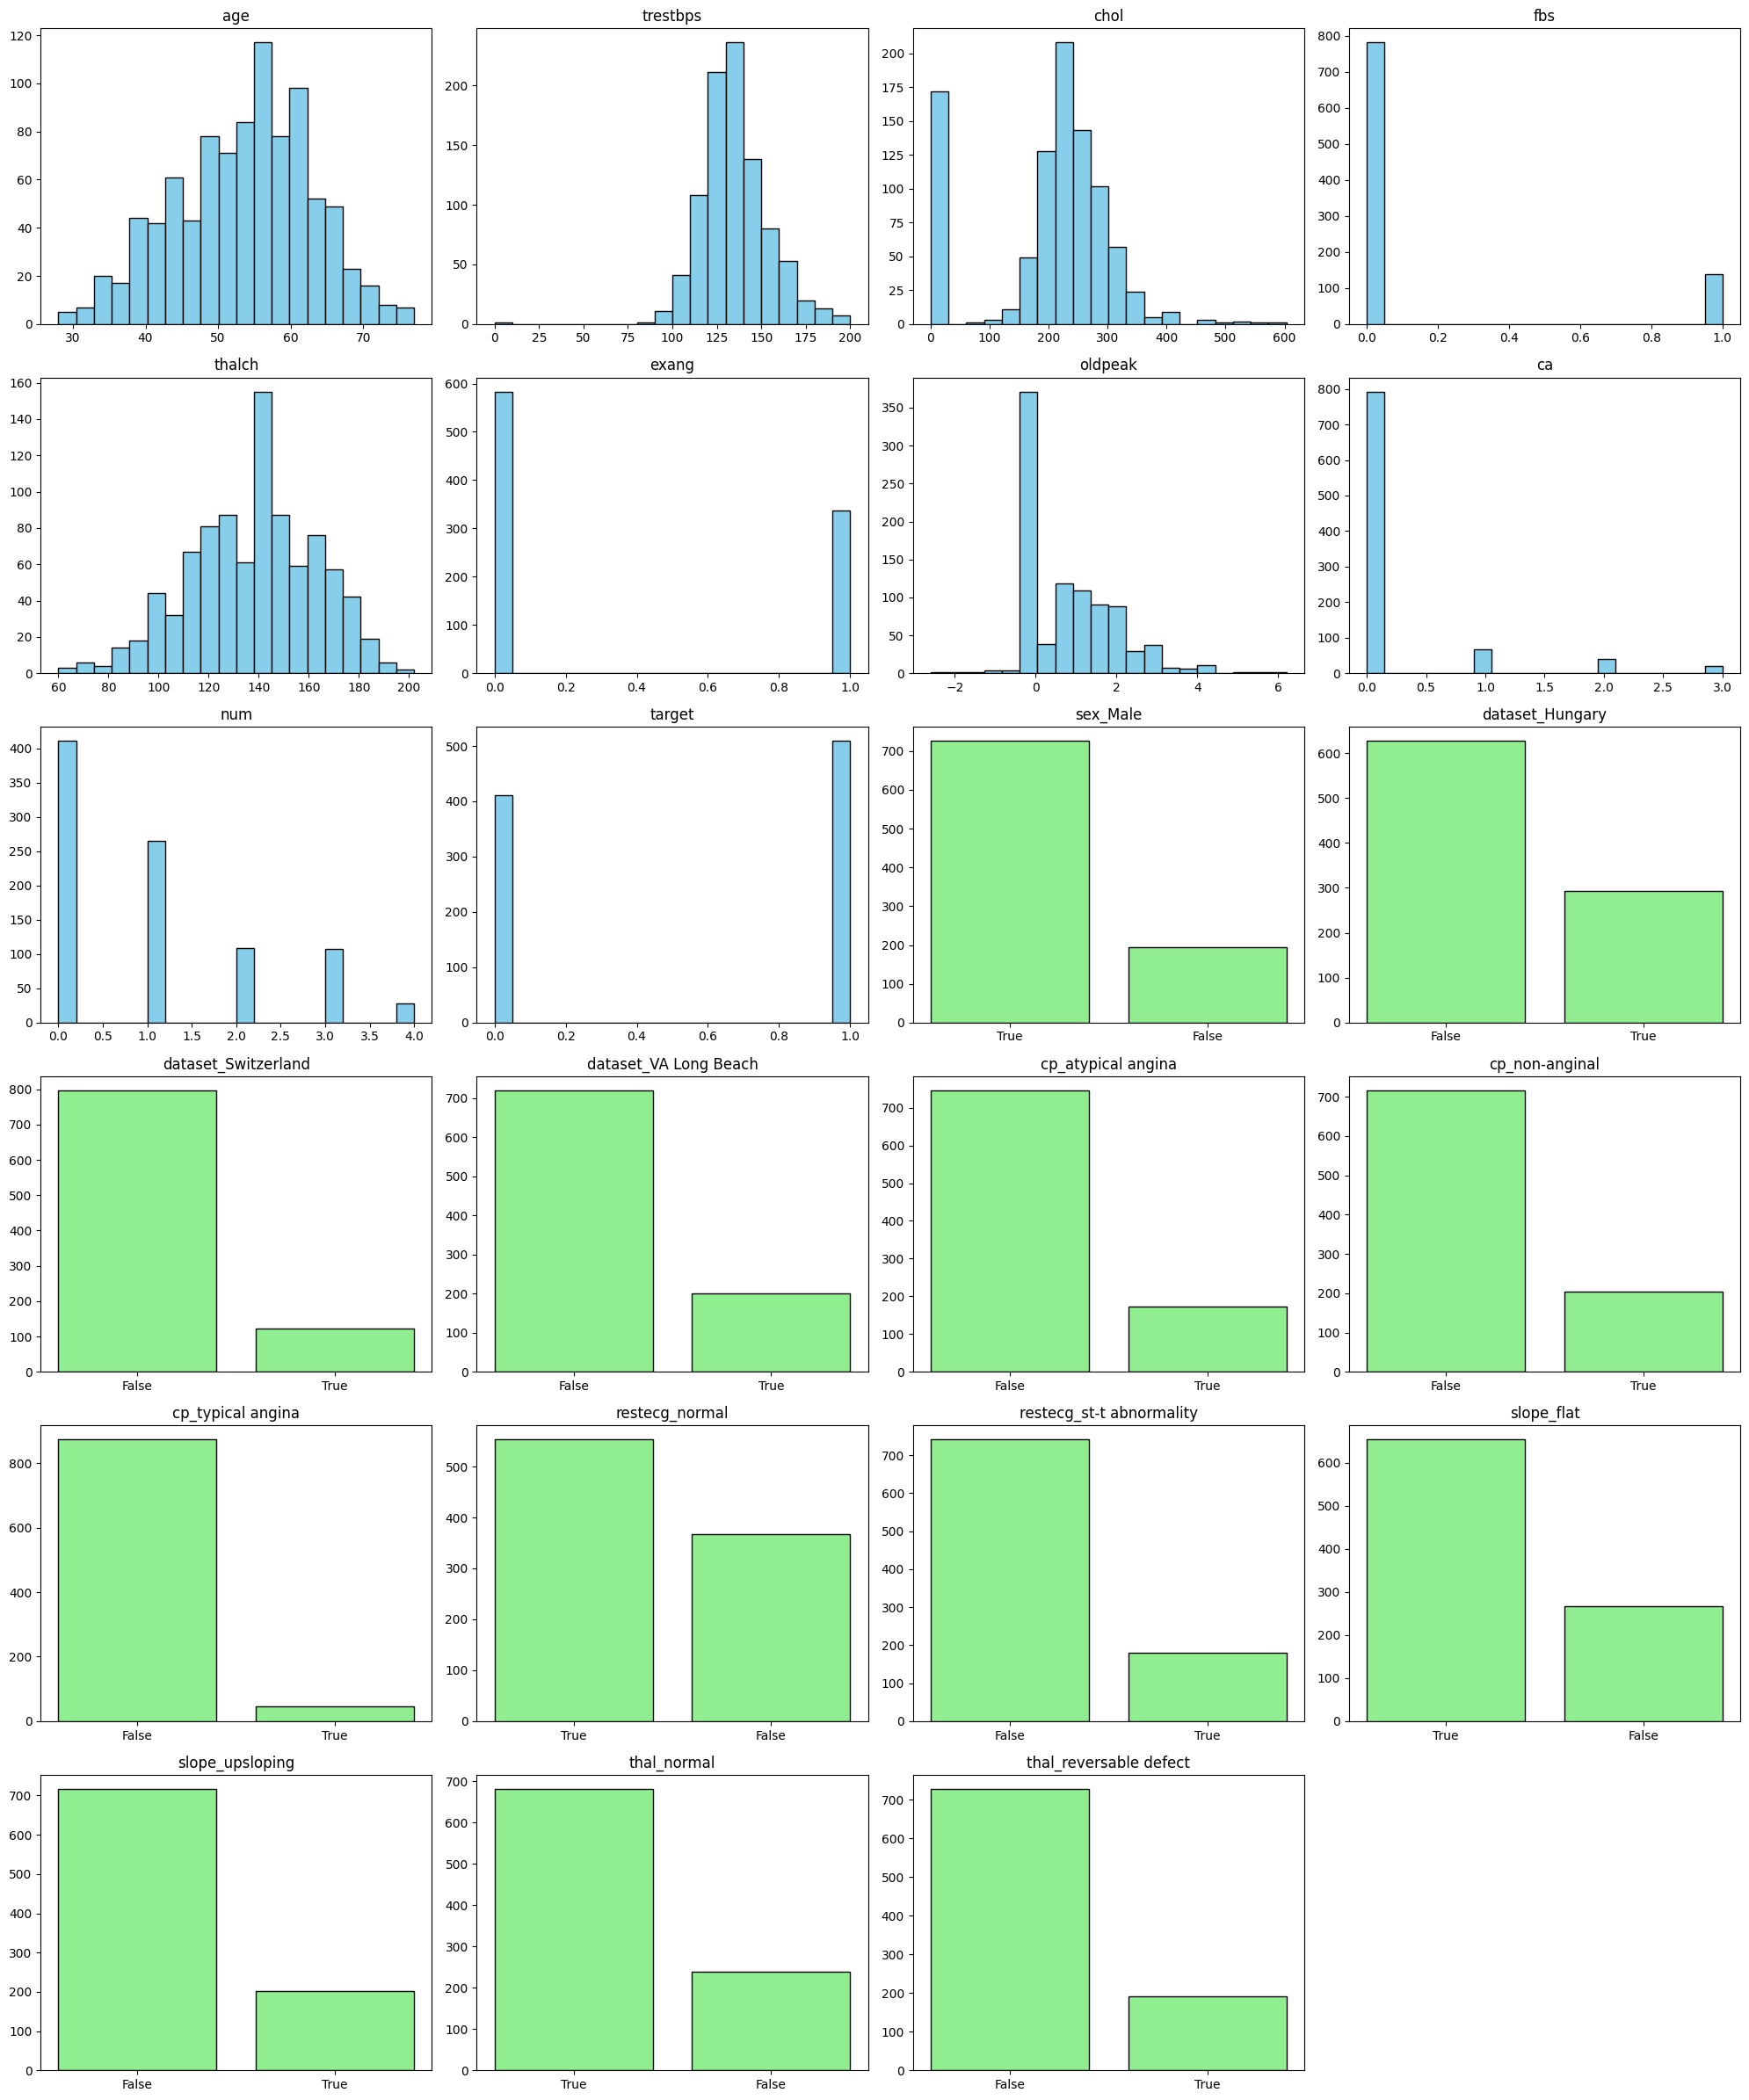

In [ ]:
import matplotlib.pyplot as plt

cols = df.drop(columns=['id']).columns
n = len(cols)

rows = (n // 4) + 1  # arrange in 4 columns per row
plt.figure(figsize=(20, rows*4))

for i, col in enumerate(cols, 1):
    plt.subplot(rows, 4, i)
    if df[col].dtype in ['int64','float64']:
        plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    else:
        counts = df[col].value_counts()
        plt.bar(counts.index.astype(str), counts.values, color='lightgreen', edgecolor='black')
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['num','target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=3217, stratify=y
)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

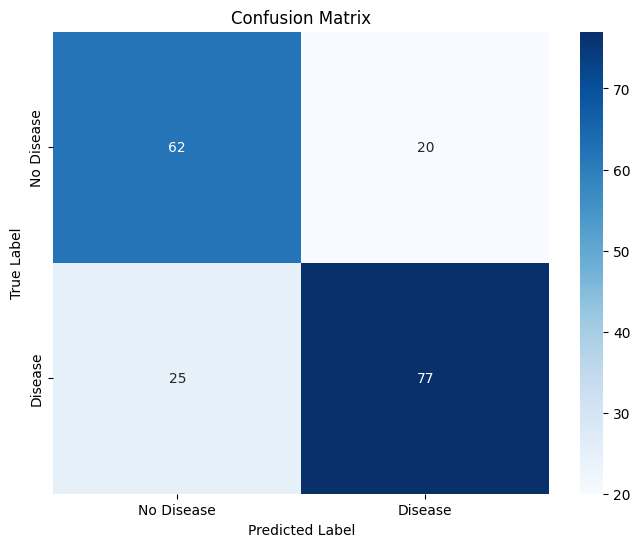

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_train_pred = nb.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_pred)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.76      0.73        82
           1       0.79      0.75      0.77       102

    accuracy                           0.76       184
   macro avg       0.75      0.76      0.75       184
weighted avg       0.76      0.76      0.76       184



In [ ]:
print(f"Train Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

Train Accuracy: 83.97%
Test Accuracy: 75.54%


In [ ]:

test_set_small = df.sample(n=5, random_state=42)

X_test_small = test_set_small.drop(columns=['num', 'target'])
y_test_small = test_set_small['target']


y_pred_small = nb.predict(X_test_small)

In [ ]:
from sklearn.metrics import accuracy_score

small_test_accuracy = accuracy_score(y_test_small, y_pred_small)

print(f"Accuracy on the small test set: {small_test_accuracy * 100:.2f}%")

Accuracy on the small test set: 60.00%


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
import numpy as np

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


nb_cv = GaussianNB()


cv_scores = cross_val_score(nb_cv, X, y, cv=cv, scoring='accuracy')


print("Cross-validation scores (accuracy) for each fold:")
print(cv_scores)


mean_cv_accuracy = np.mean(cv_scores)
print(f"\nMean cross-validation accuracy: {mean_cv_accuracy * 100:.2f}%")

Cross-validation scores (accuracy) for each fold:
[0.89130435 0.77173913 0.88043478 0.75       0.75       0.85869565
 0.80434783 0.82608696 0.7826087  0.81521739]

Mean cross-validation accuracy: 81.30%
